### AIT 526 - Natural Language Processing
### Lab 2: Text Summarization for Webpage
#### Group 9:
#### Yasser Parambathkandy
#### Indranil Pal
#### 6/23/2023


##### Installation
Install below packages before running notebook

pip install nltk

pip install matplotlib


##### Task 1 : Text Summarization with Word Frequencies </b>

1.1 Use the web scraping technique with BeautifulSoup to get the text data from the Wikipedia webpage

In [1]:
import bs4 as bs
import urllib.request
import re

url = 'https://en.wikipedia.org/wiki/Natural_language_processing'
scraped_data = urllib.request.urlopen(url)
text = scraped_data.read()
parsed_text = bs.BeautifulSoup(text, 'lxml')
# extract all paragraph tags
paragraphs = parsed_text.find_all('p')
formatted_text = ''

for para in paragraphs:
    formatted_text += para.text

# Removing Square Brackets and Extra Spaces like references, etc.
formatted_text = re.sub(r'\[[0-9]*\]', ' ', formatted_text)
formatted_text = re.sub(r'\s+', ' ', formatted_text)

print(formatted_text)

Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves. Challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation. Natural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that 

1.2 Preprocess the text data and must include tokenizing words, removing stop words and punctuation, etc.

In [2]:
# Preprocessing text before calculating word frequencies

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation

sw = stopwords.words('english')

# Tokenize words
words = word_tokenize(formatted_text)
# Remove punctuations
without_punct = [w.lower() for w in words if w.lower() not in punctuation]
# Remove stop words
words_without_stopwords = [w for w in without_punct if w not in sw]

from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')
# lemmatize words to root form to get better frequencies
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(w) for w in words_without_stopwords]

print(lemmatized_words)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yaraf\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['natural', 'language', 'processing', 'nlp', 'interdisciplinary', 'subfield', 'linguistics', 'computer', 'science', 'artificial', 'intelligence', 'concerned', 'interaction', 'computer', 'human', 'language', 'particular', 'program', 'computer', 'process', 'analyze', 'large', 'amount', 'natural', 'language', 'data', 'goal', 'computer', 'capable', '``', 'understanding', "''", 'content', 'document', 'including', 'contextual', 'nuance', 'language', 'within', 'technology', 'accurately', 'extract', 'information', 'insight', 'contained', 'document', 'well', 'categorize', 'organize', 'document', 'challenge', 'natural', 'language', 'processing', 'frequently', 'involve', 'speech', 'recognition', 'natural-language', 'understanding', 'natural-language', 'generation', 'natural', 'language', 'processing', 'root', '1950s', 'already', '1950', 'alan', 'turing', 'published', 'article', 'titled', '``', 'computing', 'machinery', 'intelligence', "''", 'proposed', 'called', 'turing', 'test', 'criterion', 'in

1.3 Calculate word frequencies or weighted word frequencies

In [3]:
from nltk.probability import FreqDist


def find_weighted_frequency(dist):
    """
    Normalizing the frequency for better scoring. Get the max frequency and divide that for all frequency values
    :param dist:
    :return:
    """
    max_freq = max(dist.values())
    weighted_frequencies = {}

    for _word, _frequency in dist.items():
        weighted_frequencies[_word] = _frequency / max_freq

    return weighted_frequencies


# Calculate word frequencies
freq_dist = FreqDist(lemmatized_words)
weighted_word_frequencies = find_weighted_frequency(freq_dist)

# Sort the weighted word frequencies in descending order
sorted_frequencies = sorted(weighted_word_frequencies.items(), key=lambda x: x[1], reverse=True)

print("Top 10 weighted word Frequencies:")
for word, frequency in sorted_frequencies[:10]:
    print(f"{word}: {frequency}")

Top 10 weighted word Frequencies:
language: 1.0
natural: 0.6538461538461539
nlp: 0.6538461538461539
processing: 0.5384615384615384
statistical: 0.5
cognitive: 0.5
task: 0.46153846153846156
model: 0.4230769230769231
linguistics: 0.34615384615384615
rule: 0.34615384615384615


1.4 Score the sentences

In [34]:
from nltk import sent_tokenize

# this threshold is used to consider only sentences that are 50 words or lower.
# Longer sentences have more words and when the score is calculated based on sum of individual words,
# they will always get higher score.
sentence_length_threshold = 50
# tokenize sentences
sentences = sent_tokenize(formatted_text)
sentence_score = {}
# iterate over each sentence, if it is less than threshold defined above, sum all the weighted
# word frequencies of the words in the sentence
for sentence in sentences:
    sentence_words = word_tokenize(sentence.lower())
    if len(sentence_words) <= sentence_length_threshold:
        sentence_frequency = sum(weighted_word_frequencies.get(word, 0) for word in sentence_words)
        sentence_score[sentence] = sentence_frequency

# Sort the weighted word frequencies in descending order
sorted_sentence_frequencies = sorted(sentence_score.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 frequencies
print("Top 10 sentence Frequencies:")
for sentence, frequency in sorted_sentence_frequencies[:10]:
    print(f"{sentence}: {frequency}")

Top 10 sentence Frequencies:
Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.: 7.269230769230768
Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing.: 4.9230769230769225
However, part-of-speech tagging introduced the use of hidden Markov models to natural language processing, and increasingly, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to the features making up the input data.: 4.884615384615384
For instance, the term neural machine translation (NMT) emphasizes the fact that deep learning-based approaches to machine translation directly learn se

1.5 a) Build a summary based on sentence count

In [5]:
def summary_by_sentence_count(count, sentence_freq):
    """
    Summarize using the top sentences based on frequencies
    :param count:
    :param sentence_freq:
    :return:
    """
    tokenized_sentences = sent_tokenize(" ".join(sentence for sentence, _ in sentence_freq))
    summary_sentences = tokenized_sentences[:count]
    # if order of sentences in original needs to be preserved then use below
    # summary_sentences = [sentence for sentence in sentences if sentence in selected_sentences]
    return ' '.join(summary_sentences)


sentence_count = 3
summary = summary_by_sentence_count(sentence_count, sorted_sentence_frequencies)
print(summary)

Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing. However, part-of-speech tagging introduced the use of hidden Markov models to natural language processing, and increasingly, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to the features making up the input data.


1.5 b) Build a summary based on word count

In [16]:
# Summarization based on word count
# Assumption: The summarization is not exactly cut iff at max words. It will most likely be less
# than the requested cutoff. It is ensured the sentences are full and added to summary until threshold is not
# exceeded
def summary_by_word_count(max_words, sentence_freq):
    """
    Summarization based on word count
    :param max_words:
    :param sentence_freq:
    :return:
    """
    selected_sentences = []
    word_count = 0
    # for each of the sentence in the sorted sentence frequency dictionary,
    # track the words and if the next sentence is more than the threshold,
    # exit
    for sentence, _ in sentence_freq:
        if word_count + len(word_tokenize(sentence)) <= max_words:
            selected_sentences.append(sentence)
            word_count += len(word_tokenize(sentence))
        else:
            break
    return ' '.join(selected_sentences)

max_word_count = 50
summary = summary_by_word_count(max_word_count, sorted_sentence_frequencies)
print(summary)

Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.


1.5 c) Build a summary based on percentage

In [19]:
# This is similar to the above except the number of the words for summarization
# is calculated based on the percentage of the entire corpus
word_percentage = 0.2
max_word_count = int(len(words) * word_percentage)
print(max_word_count)

summary = summary_by_word_count(max_word_count, sorted_sentence_frequencies)
print(summary)


311
Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing. However, part-of-speech tagging introduced the use of hidden Markov models to natural language processing, and increasingly, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to the features making up the input data. For instance, the term neural machine translation (NMT) emphasizes the fact that deep learning-based approaches to machine translation directly learn sequence-to-sequence transformations, obviating the need for intermediate steps such 

##### Task 2 : Text Summarization with N-grams </b>

2.1 Follow the following code examples to generate N-grams with NLTK:

In [8]:
from nltk.util import ngrams


def generate_ngrams(input_text, n):
    """
    generate ngrams for given text
    :param input_text:
    :param n:
    :return:
    """
    n_grams_out = ngrams(word_tokenize(input_text.lower()), n)
    return [' '.join(grams) for grams in n_grams_out]


a) Use NLTK to get N-grams and FreqDist() to calculate the n-gram frequencies.

Top 10 n-grams:
natural language processing: 12
language processing .: 5
in natural language: 4
( e.g. ,: 4
of natural language: 3
, however ,: 3
, e.g. ,: 3
language processing (: 2
processing ( nlp: 2
( nlp ): 2


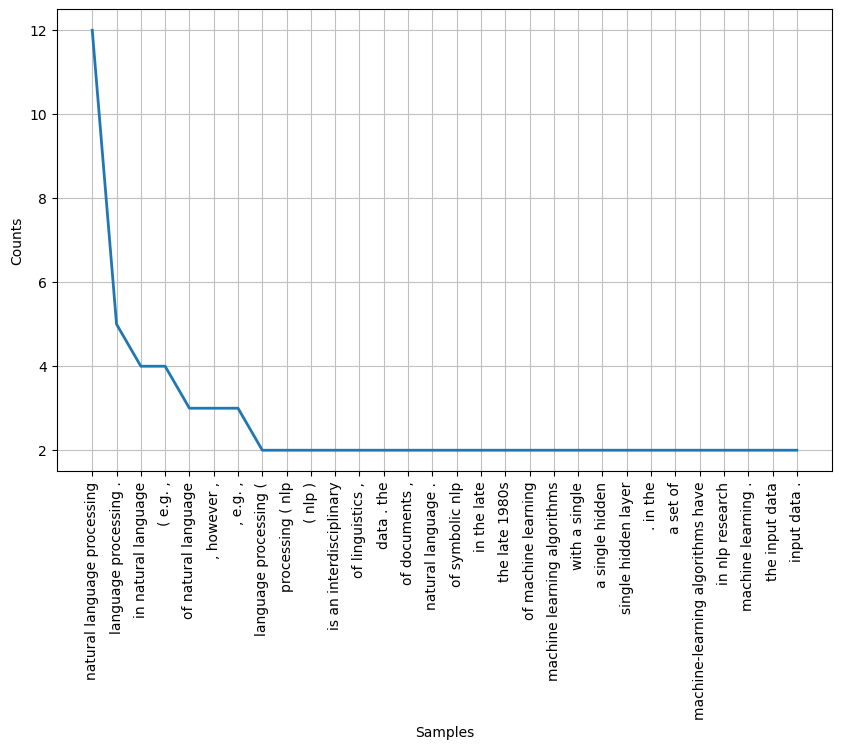

<Axes: xlabel='Samples', ylabel='Counts'>

In [9]:
import matplotlib.pyplot as plt

n = 3

# generate ngrams and its frequency distribution
n_grams = generate_ngrams(formatted_text, 3)
n_gram_freq = FreqDist(n_grams)

print("Top 10 n-grams:")
for gram, frequency in n_gram_freq.most_common(10):
    print(f"{gram}: {frequency}")

# Plot the 30 most common n-grams
plt.figure(figsize=(10, 6))
n_gram_freq.plot(30)


b) Find weighted frequency occurrences from FreqDist. You can use the similar function from Task 1.

In [10]:
ngram_freqs = find_weighted_frequency(n_gram_freq)
list(ngram_freqs.items())[0:20]

[('natural language processing', 1.0),
 ('language processing (', 0.16666666666666666),
 ('processing ( nlp', 0.16666666666666666),
 ('( nlp )', 0.16666666666666666),
 ('nlp ) is', 0.08333333333333333),
 (') is an', 0.08333333333333333),
 ('is an interdisciplinary', 0.16666666666666666),
 ('an interdisciplinary subfield', 0.08333333333333333),
 ('interdisciplinary subfield of', 0.08333333333333333),
 ('subfield of linguistics', 0.08333333333333333),
 ('of linguistics ,', 0.16666666666666666),
 ('linguistics , computer', 0.08333333333333333),
 (', computer science', 0.08333333333333333),
 ('computer science ,', 0.08333333333333333),
 ('science , and', 0.08333333333333333),
 (', and artificial', 0.08333333333333333),
 ('and artificial intelligence', 0.08333333333333333),
 ('artificial intelligence concerned', 0.08333333333333333),
 ('intelligence concerned with', 0.08333333333333333),
 ('concerned with the', 0.08333333333333333)]

c) Define the function like calculate_sentence_scores_ngram(sent_tokens, ngram_freqs, n_grams) to calculate the sentence scores for any N-grams. This function is similar to the one in Task 1.


In [35]:
def calculate_sentence_scores_ngram(sent_tokens, ngram_freqs, n_grams, n):
    """
    calculate the sentence score using the ngrams frequency
    :param sent_tokens:
    :param ngram_freqs:
    :param n_grams:
    :param n:
    :return:
    """
    weighted_ngram_frequencies = {}
    # for each sentence, if less than word threshold, sum the ngram frequencies for each ngram in the sentence
    for sentence in sent_tokens:
        sentence_words = word_tokenize(sentence.lower())
        if len(sentence_words) <= sentence_length_threshold:
            sentence_n_grams = list(ngrams(sentence_words, n))
            for ng in sentence_n_grams:
                if ' '.join(ng) in n_grams:
                    if sentence in weighted_ngram_frequencies:
                        weighted_ngram_frequencies[sentence] += ngram_freqs[' '.join(ng)]
                    else:
                        weighted_ngram_frequencies[sentence] = ngram_freqs[' '.join(ng)]
    return weighted_ngram_frequencies


# Calculate sentence scores using n-grams
sentence_scores_n_gram = calculate_sentence_scores_ngram(sentences, ngram_freqs, n_grams, n)
sorted_sentence_scores_n_gram = sorted(sentence_scores_n_gram.items(), key=lambda x: x[1], reverse=True)
sorted_sentence_scores_n_gram[:10]

[('However, part-of-speech tagging introduced the use of hidden Markov models to natural language processing, and increasingly, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to the features making up the input data.',
  6.416666666666668),
 ('Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.',
  5.166666666666666),
 ('Increasingly, however, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to each input feature (complex-valued embeddings, and neural networks in general have also been proposed, for e.g.',
  5.0833333333333295),
 ('For instance, the term neural machine translation (NMT) empha

d) Summary text based on sentence count

In [14]:
sentence_count = 3
summary = summary_by_sentence_count(sentence_count, sorted_sentence_scores_n_gram)
print(summary)

However, part-of-speech tagging introduced the use of hidden Markov models to natural language processing, and increasingly, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to the features making up the input data. Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. Increasingly, however, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to each input feature (complex-valued embeddings, and neural networks in general have also been proposed, for e.g.


d) Summary text based on word count

In [17]:
max_word_count = 50
summary = summary_by_word_count(max_word_count, sorted_sentence_scores_n_gram)
print(summary)

However, part-of-speech tagging introduced the use of hidden Markov models to natural language processing, and increasingly, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to the features making up the input data.


d) Summary text based on word percentage count

In [20]:
word_percentage = 0.2
max_word_count = int(len(words) * word_percentage)
print(max_word_count)

summary = summary_by_word_count(max_word_count, sorted_sentence_scores_n_gram)
print(summary)

311
However, part-of-speech tagging introduced the use of hidden Markov models to natural language processing, and increasingly, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to the features making up the input data. Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. Increasingly, however, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to each input feature (complex-valued embeddings, and neural networks in general have also been proposed, for e.g. For instance, the term neural machine translation (NMT) emphasizes the fact that deep learning-based approaches to machine translation directl

##### Task 3 : Comparisons - Compare these two methods for text summarization. What are different and why? Please clearly explain </b>

The two methods for text summarization used here are the frequency-based approach using word frequencies and the approach using N-grams.

Frequency-based Approach using Word Frequencies:
This approach involves calculating the frequency of each word in the text and using it to determine the importance of the word.
- The word frequencies are used to identify the most common and significant words in the text
- Sentences containing these important words are given higher scores and considered more relevant for the summary
- The summary is generated based on the top-scoring sentences, either by sentence count, word count, or percentage
- This method is based on the assumption that important information is often repeated and thus represented by frequent words
- It is relatively simpler to implement and does not require additional language processing techniques

N-grams Approach:
- In this approach, N-grams (sequences of N consecutive words) are used to capture the context and semantic relationships between words.
- Instead of considering individual words, it focuses on capturing the co-occurrence of words as multi-word units.
- Tri-grams, in this case, are used to represent three-word sequences, providing more context and meaning.
- The frequencies of the tri-grams are calculated, and sentences containing important tri-grams are given higher scores.
- The summary is generated based on the top-scoring sentences, similar to the frequency-based approach.
- N-grams capture more contextual information and can identify meaningful phrases or expressions that may not be evident with individual word frequencies alone.
- This approach is more sophisticated and can provide a better understanding of the text's structure and semantic relationships.

The summary text generated using the two approaches are different. In n-gram approach "natural language processing" is found multiple times in the first summary text whereas the word "language" is found multiple times in the first sentence. This shows that n-gram approach is more suited to consider contextual information.

### References

- Dr.Liao's code example from Module 5
- Georgiannacambel. (2020). Retrieved from https://kgptalkie.com/text-summarization-using-nlp/